# Taller 1 
MINE-4101: Applied Data Science  
Univerisdad de los Andes  
Estudiante: Alejandra Guerrero

In [1]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import re
from datetime import date

%matplotlib inline

### Punto 0: descripción de los datos y limpieza

In [4]:
# Lectura de los datos en un dataframe
df = pd.read_csv("./data/Data_Taller_1.csv", encoding='utf8')
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre;
0,Britney Spears,Oops!...I Did It Again,211160.0,False,2000.0,77.0,0.751,0.834,1.0,-5.444,0.0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop;
1,"blink-182,All The Small Things,167066,False,19...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Faith Hill,Breathe,250546,False,1999,66,0.529,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Bon Jovi,It's My Life,224493,False,2000,78,0.5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,*NSYNC,Bye Bye Bye,200560.0,False,2000.0,NaN,0.614,0.928,8.0,-4.806,0.0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop;


A partir de la lectura inicial de datos, se observa que muchas columnas quedan vacías puesto que los datos no se están separando por columna correctamente. Al revisar el archivo de datos se identifica que algunas filas inician por comilla doble ("), lo que hace que python interprete que todo la línea hace parte de la primera columna. Por tanto, es necesario quitar las comillas del inicio y su comilla de cierre.

In [5]:
# Limpieza de los datos homogenizando el uso de comillas
with open('./data/Data_Taller_1.csv', encoding='utf8') as f:
    data = re.sub(r'"""', '|', f.read())
    data = re.sub(r'""', '|', data)
    data = re.sub(r'"', '', data)
    data = re.sub(r'\|', '"', data)
    data = re.sub(r';', '', data)

# Creación de archivo csv con el formato homogenizado
with open('./data/Data_Taller_1_Limpia.csv', 'w', encoding='utf8') as f:
    f.write(data)

In [6]:
# Lectura de los datos en un dataframe
df = pd.read_csv("Data_Taller_1_Limpia.csv", encoding='utf8')

In [7]:
# Observación inicial de los datos
df.head(80)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160.0,False,2000,77.0,0.751,0.834,1,-5.444,0,0.0437,0.30000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066.0,False,1999,79.0,0.434,0.897,0,-4.918,1,0.0488,0.01030,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546.0,False,1999,66.0,0.529,0.496,7,-9.007,1,0.0290,0.17300,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493.0,False,2000,78.0,0.551,0.913,0,-4.063,0,0.0466,0.02630,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560.0,False,2000,NaN,0.614,0.928,8,-4.806,0,0.0516,0.04080,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Destiny's Child,"Jumpin', Jumpin'",230200.0,False,1999,70.0,0.771,0.685,1,-4.639,1,0.0567,0.00543,0.001570,0.0537,0.683,88.997,"pop, R&B"
76,Céline Dion,That's the Way It Is,241373.0,False,1999,64.0,0.634,0.886,9,-5.424,1,0.0434,0.15400,0.000000,0.1180,0.577,93.040,pop
77,3 Doors Down,Kryptonite,233933.0,False,2000,78.0,0.545,0.865,11,-5.708,0,0.0286,0.00664,0.000011,0.1680,0.543,99.009,"pop, rock, metal"
78,Carl Thomas,I Wish,226760.0,False,2000,52.0,0.736,0.666,1,-4.929,1,0.0337,0.05930,0.000038,0.1070,0.224,89.824,"pop, R&B"


In [8]:
# Tamaño del set de datos cargado
df.shape

(2000, 18)

In [9]:
# Tipos de variables del dataframe cargado
df.dtypes

artist               object
song                 object
duration_ms         float64
explicit             object
year                  int64
popularity          float64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object

In [10]:
# Observación inicial de los datos
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1998.000000,2000.00000,1997.000000,1997.000000,2000.000000,2000.000000,1999.000000,2000.000000,1999.000000,1997.000000,1999.000000,2000.000000,1999.000000,1998.000000
mean,228744.425926,2009.49400,59.859289,0.667363,0.720366,5.378000,-5.511914,0.553500,0.103605,0.129107,0.015234,0.181216,0.551722,120.103577
std,39155.966163,5.85996,21.348636,0.140482,0.152745,3.615059,1.933826,0.497254,0.096169,0.173431,0.087792,0.140669,0.220915,26.942555
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203540.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.489000,0.000000,0.039600,0.014000,0.000000,0.088100,0.386500,98.986750
50%,223259.500000,2010.00000,65.000000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059900,0.055800,0.000000,0.124000,0.558000,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167500,1.000000,0.129000,0.177000,0.000069,0.241000,0.730000,134.191750
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [11]:
# Eliminación de duplicados
df = df.drop_duplicates()
df.shape

(1941, 18)

### Punto 1: artistas más activos en los últimos 10 años (2013-2022)
Supuesto: el criterio de "Activo" lo define la cantidad de canciones publicadas

In [12]:
# Calculo de los 10 artistas con más canciones publicadas en los últimos 10 años
ultimos_10_años = date.today().year - 10
top_artistas = df.loc[df['year'] > ultimos_10_años]['artist'].value_counts(dropna = False)[0:10]
top_artistas

Drake               16
Ariana Grande       13
Calvin Harris       10
Taylor Swift        10
Ed Sheeran           9
Post Malone          8
The Chainsmokers     8
Selena Gomez         8
The Weeknd           8
David Guetta         7
Name: artist, dtype: int64

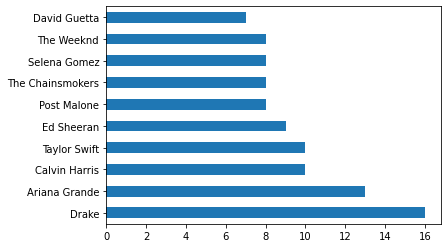

In [13]:
# Gráfica de los 10 artistas con más canciones publicadas en los últimos 10 años
top_artistas.plot(kind = 'barh')

### Punto 2: comparación de los géneros Latin y Folk/Acoustic en relación con su duración

In [14]:
# Resumen estadístico de la duración de las canciones del género latin
df[df['genre'].str.contains('latin', na=False)]['duration_ms'].describe()

count        63.000000
mean     227494.682540
std       40009.162022
min      166866.000000
25%      205140.000000
50%      223080.000000
75%      240659.500000
max      417920.000000
Name: duration_ms, dtype: float64

In [15]:
# Resumen estadístico de la duración de las canciones del género Folk/Acoustic
df[df['genre'].str.contains('Folk/Acoustic', na=False)]['duration_ms'].describe()

count        20.000000
mean     220183.650000
std       30164.904758
min      160097.000000
25%      203166.250000
50%      217846.500000
75%      238541.750000
max      278666.000000
Name: duration_ms, dtype: float64

In [16]:
# Diferencia del tiempo promedio de ambos géneros
mean_latin = df[df['genre'].str.contains('latin', na=False)]['duration_ms'].mean()
mean_folk = df[df['genre'].str.contains('Folk/Acoustic', na=False)]['duration_ms'].mean()
diferencia = mean_latin - mean_folk
print(diferencia)

7311.03253968255


De acuerdo con el resumen estadístico de ambos géneros, se puede observar que existe el triple de canciones del género latin respecto al género 'Folk/Acoustic'. Por otro lado, las canciones del género latin suelen ser más largas en términos de segundos, no representa una diferencia significativa a nivel de minutos. La diferencia entre el tiempo promedio de ambos géneros es de 7311ms. 

In [17]:
# Revision de si existen canciones que clasifiquen como latin y como Folk/Acoustic
# No se encontró alguna
df.loc[(df['genre'].str.contains('latin', na=False) == True) & (df['genre'].str.contains('Folk/Acoustic', na=False))== True]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre


In [18]:
# Funcion que clasifica una canción dentro de las categorías de interés
def genero(x):
    x = str(x)
    if x.find('latin') != -1:
        return 'latin'
    elif x.find('Folk/Acoustic') != -1:
        return 'Folk/Acoustic'
    else:
        return 'NA'

In [19]:
# Creación de un dataframe temporal con las columnas de interés
df_tmp = df[['song', 'genre', 'duration_ms']]
df_tmp['genero'] = df_tmp['genre'].apply(genero)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


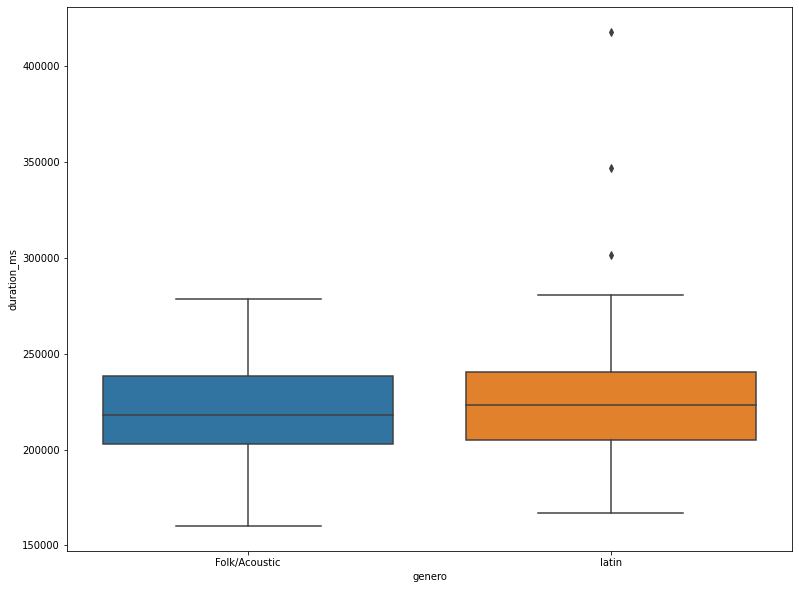

In [20]:
# Representación gráfica del comportamiento de la duración de las canciones de latin y Folk/Acoustic
plt.figure(figsize = (13, 10))
sns.boxplot(x = 'genero', y = 'duration_ms', data = df_tmp.loc[~df_tmp['genero'].isin(['NA'])])

Nuevamente, se observa que las canciones del género latin suelen ser más largas respecto a Folk/Acoustic, pero no representa una diferencia significativa. Por otro lado, en el caso del género latin se identifican algunas canciones que duran mucho más de lo usual.

### Punto 3 : top 5 de los géneros más populares en 2019 y su comportamiento
Supuesto: una canción que pertenece a más de un género musical, se contabiliza dentro de cada uno de los géneros a los cuales pertenece

In [21]:
# Creacion de dataframe de canciones separando cada canción en sus múltiples géneros musicales
df_tmp = df.copy()
df_tmp['genre'] = df_tmp['genre'].str.split(',')
df_tmp = df_tmp.explode('genre', ignore_index=True)
df_tmp['genre'] = df_tmp['genre'].str.strip()
df_tmp.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160.0,False,2000,77.0,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.355,0.894,95.053,pop
1,blink-182,All The Small Things,167066.0,False,1999,79.0,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.612,0.684,148.726,rock
2,blink-182,All The Small Things,167066.0,False,1999,79.0,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.612,0.684,148.726,pop
3,Faith Hill,Breathe,250546.0,False,1999,66.0,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.251,0.278,136.859,pop
4,Faith Hill,Breathe,250546.0,False,1999,66.0,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.251,0.278,136.859,country


In [22]:
# Cálculo del top 5 de los géneros del 2019 según la cantidad de canciones
top_generos = df_tmp.loc[df_tmp['year'] == 2019]['genre'].value_counts(dropna = False)[0:5].reset_index(name="count")
top_generos

,index,count
0,pop,63
1,hip hop,38
2,Dance/Electronic,21
3,R&B,9
4,latin,8


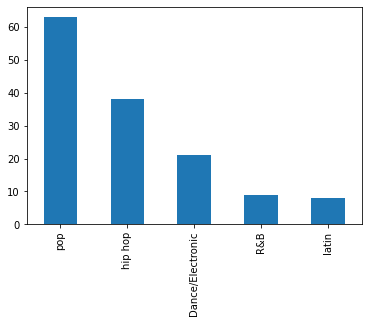

In [23]:
# Gráfica del top 5 de los géneros del 2019 según la cantidad de canciones
df_tmp.loc[df_tmp['year'] == 2019]['genre'].value_counts(dropna = False)[0:5].plot(kind='bar')

In [24]:
# Variación del top de canciones del 2019 en los años 2000, 2005, 2010, 2015, 2019
años = [2000, 2005, 2010, 2015, 2019]
top_generos_años = df_tmp.loc[(df_tmp['year'].isin(años)) & (df_tmp['genre'].isin(top_generos['index']))].groupby(['genre', 'year']).size().reset_index(name="count")
top_generos_años

,genre,year,count
0,Dance/Electronic,2000,4
1,Dance/Electronic,2005,5
2,Dance/Electronic,2010,28
3,Dance/Electronic,2015,28
4,Dance/Electronic,2019,21
5,R&B,2000,24
6,R&B,2005,30
7,R&B,2010,22
8,R&B,2015,19
9,R&B,2019,9


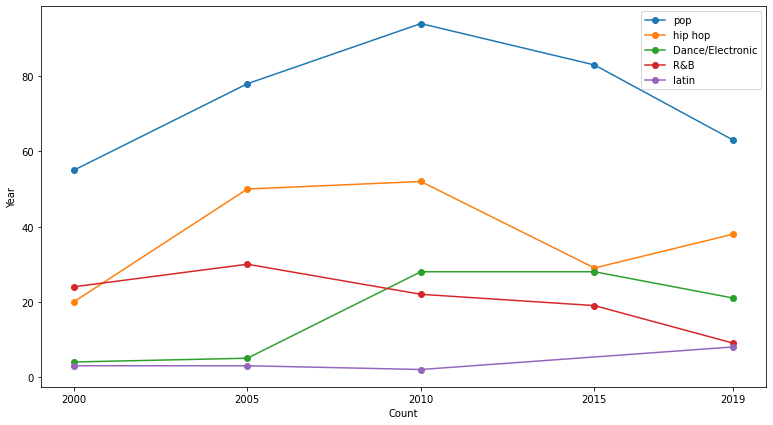

In [25]:
# Variación del top de canciones del 2019 en los años 2000, 2005, 2010, 2015, 2019
plt.figure(figsize = (13, 7))

for i in top_generos['index']:
    plt.plot(top_generos_años.loc[top_generos_años['genre'] == i]['year'], top_generos_años.loc[top_generos_años['genre'] == i]['count'], marker='o', linestyle='-', label=i)

plt.xlabel('Count')
plt.ylabel('Year')
plt.xticks(años)
plt.legend(loc = 'upper right')
plt.show()

En 2019, el top 5 de géneros musicales fue pop, hip hop, dance/electronic, R&B y latin. Dichos géneros musicales tuvieron el comportamiento que se aprecia en la gráfica previa. Excepto por el género R&B que disminuyó en popularidad con el paso del tiempo, desde el 2000 los otros géneros han crecido teniendo una mayor auge en el 2010.

### Punto 4: progresión de nuevos artistas

In [26]:
# Calculo del año en que un artista se consideró nuevo o apareció por primera vez
nuevos_artistas = df.groupby("artist").agg({"year":min}).reset_index()
nuevos_artistas

,artist,year
0,*NSYNC,2000
1,112,2001
2,2 Chainz,2013
3,21 Savage,2017
4,2Pac,2001
...,...,...
830,girl in red,2018
831,iann dior,2019
832,iio,2006
833,t.A.T.u.,2020


In [27]:
# Cantidad de nuevos artistas por año
nuevos_artistas['year'].value_counts(dropna = False)

2001    60
2000    55
2017    44
2004    44
2003    42
2014    41
2019    41
2005    40
2016    40
2018    39
2002    39
2015    39
2006    38
2007    37
2010    35
2011    35
2012    34
2008    34
2013    33
2009    31
1999    30
2020     3
1998     1
Name: year, dtype: int64

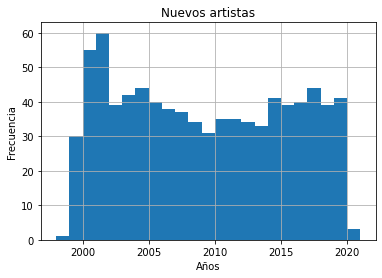

In [28]:
# Grafica con la progresión de nuevos artistas por año
intervalos = range(min(nuevos_artistas['year']), max(nuevos_artistas['year']) + 2)
plt.hist(x=nuevos_artistas['year'], bins=intervalos)
plt.title('Nuevos artistas')
plt.xlabel('Años')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

Se identifica que a inicios de los años 2000 surgieron significativamente nuevos artistas. Ignorando los años extremos que pueden tener falta de datos, en el año 2009 hubo una caída de nuevos cantantes. En los otros años, hubo un comportamiento relativamente constante.

### Punto 5: progresión de la popularidad
Supuesto: una canción que pertenece a más de un género musical, se contabiliza dentro de cada uno de los géneros a los cuales pertenece

In [29]:
# Cálculo del promedio de la popularidad desagregado por género musical y año
popularidad = df_tmp.groupby(['genre', 'year']).agg({"popularity":'mean'}).reset_index()
generos = popularidad['genre'].unique()
popularidad

,genre,year,popularity
0,Dance/Electronic,1999,57.000000
1,Dance/Electronic,2000,53.000000
2,Dance/Electronic,2001,56.833333
3,Dance/Electronic,2002,54.666667
4,Dance/Electronic,2003,52.600000
...,...,...,...
195,set(),2013,74.000000
196,set(),2014,73.000000
197,set(),2016,57.000000
198,set(),2018,67.000000


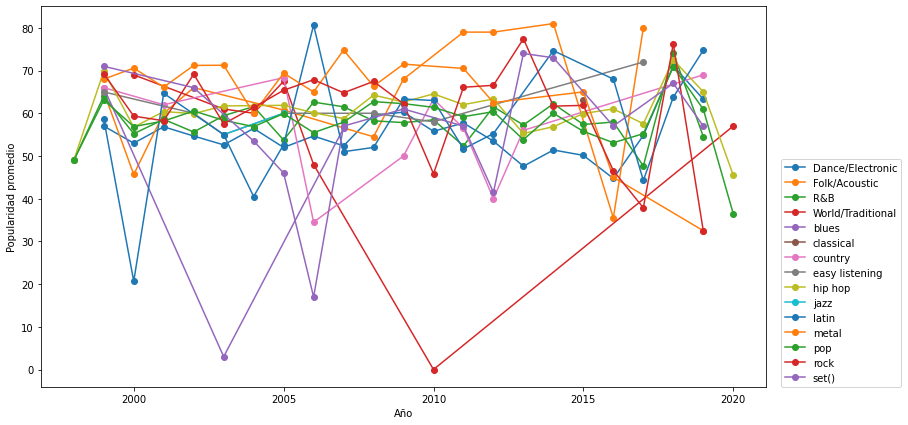

In [30]:
# Variación del promedio de la popularidad por año
plt.figure(figsize = (13, 7))

for i in generos:
    plt.plot(popularidad.loc[popularidad['genre'] == i]['year'], popularidad.loc[popularidad['genre'] == i]['popularity'], marker='o', linestyle='-', label=i)

plt.xlabel('Año')
plt.ylabel('Popularidad promedio')
plt.legend(loc=(1.02, 0))
plt.show()

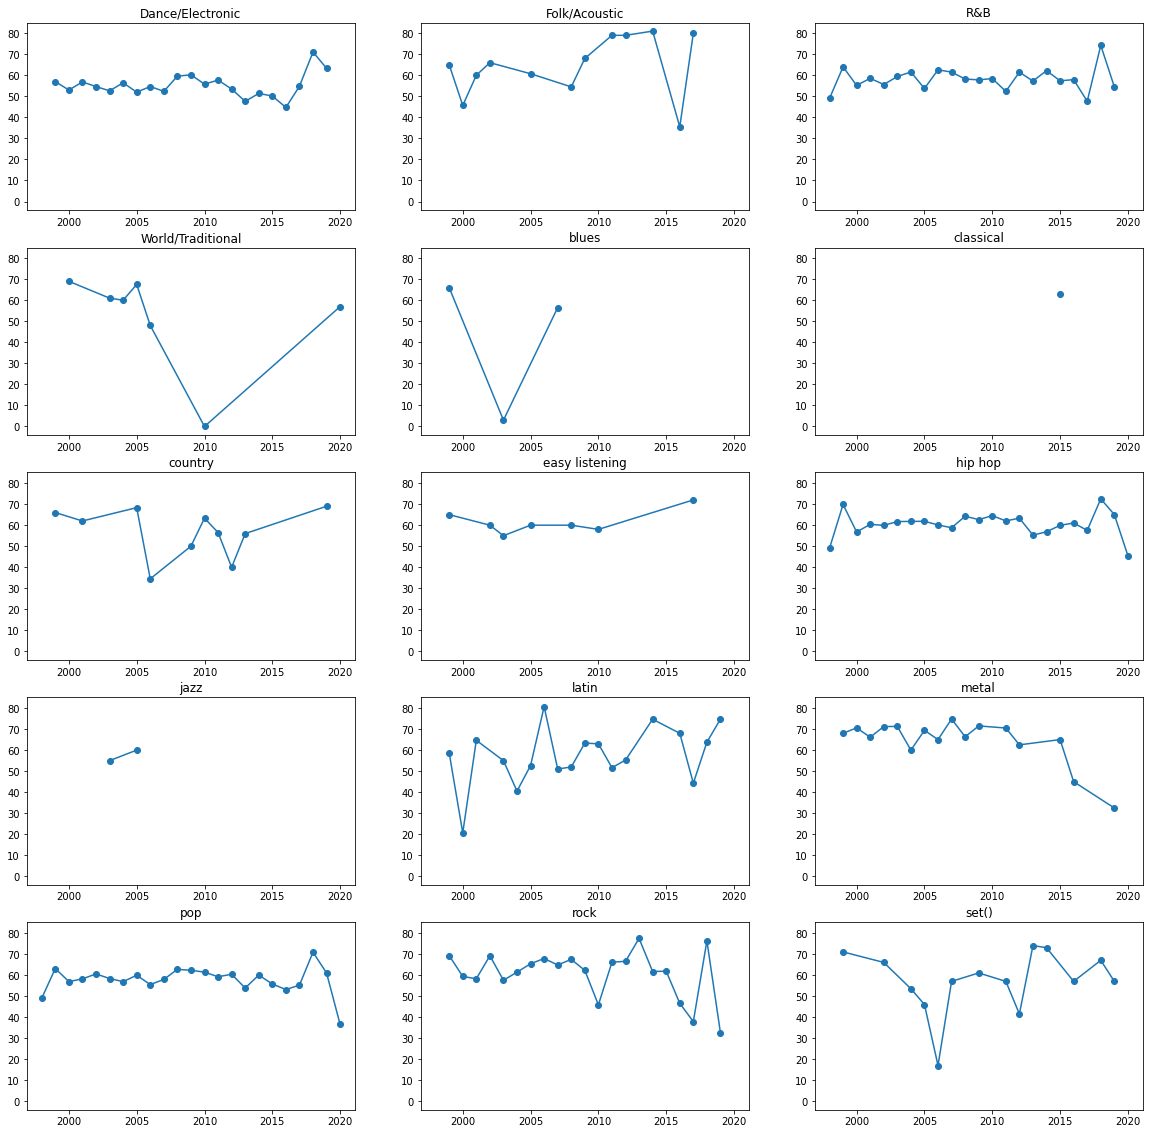

In [31]:
# Variación del promedio de la popularidad desagregado por género musical y año
col = 3
rows = int(np.ceil(len(generos)/col))
figure, axis = plt.subplots(rows, col, figsize=(20, 20), sharex='all', sharey='all')
j=0

for i in generos:
    x, y = int(j/col), int(j%col)
    axis[x, y].plot(popularidad.loc[popularidad['genre'] == i]['year'], popularidad.loc[popularidad['genre'] == i]['popularity'], marker='o')
    axis[x, y].set_title(i)
    axis[x, y].xaxis.set_tick_params(which='both', labelbottom=True)
    axis[x, y].yaxis.set_tick_params(which='both', labelbottom=True)
    j += 1

plt.show()

A partir de las gráficas anteriores, se puede concluir que los géneros Dance, R&B, hip hop y rock se han mantenido populares con el paso del tiempo, aunque bien pueden fluctuar. Sin embargo, géneros como Blues, classical y jazz no tienen muchas canciones y no son tan populares.

### Punto 6: comparación de los géneros Pop y Rock

In [32]:
# Comparación estadística de los géneros Pop y Rock
descripcion = df_tmp.loc[df_tmp['genre'].isin(['pop', 'rock'])].groupby('genre')[['energy', 'valence', 'tempo']].describe().unstack(1).reset_index().pivot(index=['genre', 'level_0'], values=0, columns='level_1')
descripcion

level_1              25%       50%        75%   count      max        mean  \
genre level_0                                                                
pop   energy     0.61825    0.7320    0.83275  1582.0    0.999    0.715886   
      tempo     99.00900  120.0150  133.05300  1581.0  210.851  119.732266   
      valence    0.39200    0.5600    0.73900  1581.0    0.973    0.554806   
rock  energy     0.71000    0.8295    0.90325   224.0    0.988    0.791027   
      tempo    104.63150  124.3950  144.73750   224.0  199.935  126.155839   
      valence    0.36800    0.5320    0.71350   224.0    0.965    0.527743   

level_1            min        std  
genre level_0                      
pop   energy    0.0549   0.151564  
      tempo    60.0190  26.448198  
      valence   0.0381   0.221479  
rock  energy    0.3160   0.140706  
      tempo    68.9760  28.000921  
      valence   0.0681   0.218133

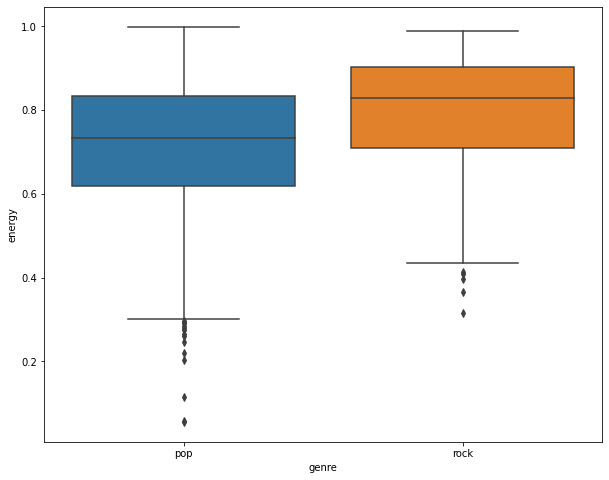

In [33]:
# Representación gráfica de la variable energy para los géneros Pop y Rock
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'genre', y = 'energy', data = df_tmp.loc[df_tmp['genre'].isin(['pop', 'rock'])])

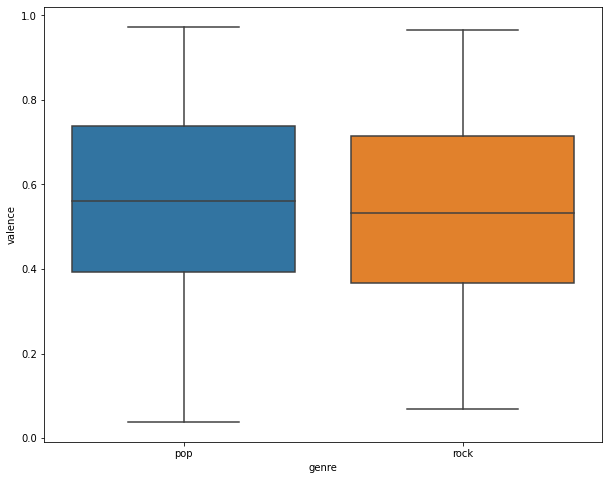

In [34]:
# Representación gráfica de la variable valence para los géneros Pop y Rock
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'genre', y = 'valence', data = df_tmp.loc[df_tmp['genre'].isin(['pop', 'rock'])])

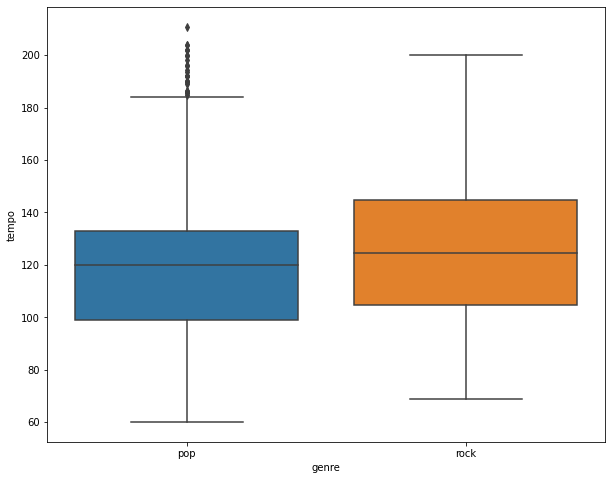

In [35]:
# Representación gráfica de la variable tempo para los géneros Pop y Rock
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'genre', y = 'tempo', data = df_tmp.loc[df_tmp['genre'].isin(['pop', 'rock'])])

De las tres gráficas anteriores que comparan los géneros pop y rock, se puede concluir que el género rock tiene una mayor energía o intensidad y se caracteriza por tener una mayor cantidad de pulsaciones por minuto (Tempo). Sin embargo, ambos géneros no se diferencian mucho en su valence o percepción de positividad musical.

###Punto 7: pregunta de negocio de interés
**Relación entre el género musical, la popularidad y el indicador danceability en el año 2012.**

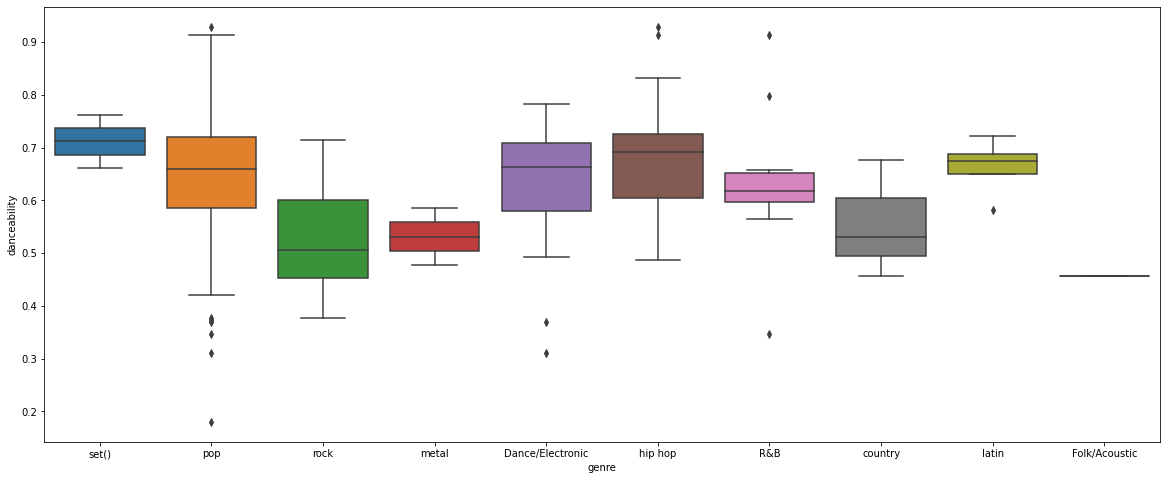

In [40]:
# Representación gráfica de la variable danceability para todos los géneros
plt.figure(figsize = (20, 8))
sns.boxplot(x = 'genre', y = 'danceability', data = df_tmp.loc[df_tmp['year']==2012])

Se puede observar que los géneros pop, hip hop, dance y latin suelen tener un mejor indice de danceability. 

In [37]:
# Funcion que categoriza la variable danceability
def danceability_cat(x):
    X = float(x)
    if x < 0.3:
        return 'No bailable'
    elif x < 0.6:
        return 'Poco bailable'
    elif x < 0.9:
        return 'Bailable'
    elif x < 1:
        return 'Muy bailable'
    else:
        return 'No bailable'

In [38]:
# Creación de la columna que categoriza la variable danceability
df_tmp['danceability_cat'] = df_tmp['danceability'].apply(danceability_cat)
df_tmp

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,danceability_cat
0,Britney Spears,Oops!...I Did It Again,211160.0,False,2000,77.0,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,Bailable
1,blink-182,All The Small Things,167066.0,False,1999,79.0,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,rock,Poco bailable
2,blink-182,All The Small Things,167066.0,False,1999,79.0,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,pop,Poco bailable
3,Faith Hill,Breathe,250546.0,False,1999,66.0,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,pop,Poco bailable
4,Faith Hill,Breathe,250546.0,False,1999,66.0,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,country,Poco bailable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3583,Taylor Swift,Cruel Summer,178426.0,False,2019,78.0,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop,Poco bailable
3584,Blanco Brown,The Git Up,200593.0,False,2019,69.0,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,NaN,hip hop,Bailable
3585,Blanco Brown,The Git Up,200593.0,False,2019,69.0,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,NaN,country,Bailable
3586,Sam Smith,Dancing With A Stranger (with Normani),171029.0,False,2019,75.0,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop,Bailable


<class 'str'>


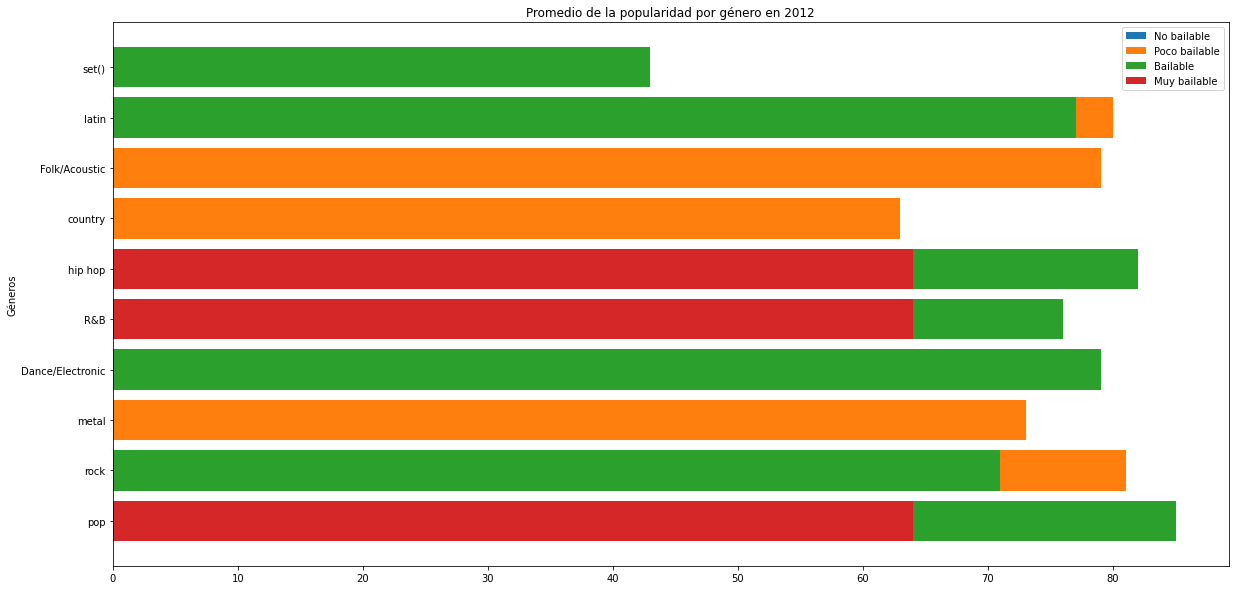

In [41]:
# Relación entre el género musical, la popularidad y el indicador danceability categórico en el año 2012.
niveles = ['No bailable', 'Poco bailable', 'Bailable', 'Muy bailable']
fig, ax = plt.subplots(figsize=(20, 10))

print(type(niveles[0]))

for i in niveles:
    ax.barh(df_tmp.loc[(df_tmp['danceability_cat'] == i) & (df_tmp['year'] == 2012)]['genre'].astype(str), 
            df_tmp.loc[(df_tmp['danceability_cat'] == i) & (df_tmp['year'] == 2012)]['popularity'], label=i)

ax.set_ylabel('Géneros')
ax.set_title('Promedio de la popularidad por género en 2012')
ax.legend()

plt.show()

A partir de las gráficas anteriores, se puede observar que no necesariamente las canciones tienen que percibirser como bailables para ser consideradas populares. 